In [1]:
import pandas as pd
import re

In [2]:
df= pd.read_csv('./data/sentence_data.csv')

# Preprocessing

1) Drop all Nan row

In [3]:
#drop all Nan
df.dropna(inplace= True)
df

,city,country,Review,sent_list
0,Vienna,Austria,Location was good Have stayed before I e 9yrs...,Have stayed before I e 9yrs ago shop no longer...
1,Vienna,Austria,Breakfast options are limited Personally i wo...,Personally i would choose a hotel closer to an...
2,City of London,United Kingdom,The room was a great size for a city hotel Th...,The room was a great size for a city hotel
3,City of London,United Kingdom,The room was a great size for a city hotel Th...,The shower was great Lovely old building with ...
4,West End of London,United Kingdom,The room was small and the bathroom was minut...,The room was small and the bathroom was minute
...,...,...,...,...
968664,el Besòs i el Maresme,Spain,Reception area very shabby Walls in bedroom w...,Walls in bedroom were so thin you could hear e...
968665,Vienna,Austria,I was informed when I checked in that I would...,I was informed when I checked in that I would ...
968666,Amsterdam,Netherlands,Could hear other people shutting doors but di...,Could hear other people shutting doors but did...
968667,Vienna,Austria,Hotel is showing signs of wear Room furniture...,Room furniture was worn and shabby bed amazing...


In [4]:
samples=df.copy(deep=True)
sample=samples[:20000]
sample

,city,country,Review,sent_list
0,Vienna,Austria,Location was good Have stayed before I e 9yrs...,Have stayed before I e 9yrs ago shop no longer...
1,Vienna,Austria,Breakfast options are limited Personally i wo...,Personally i would choose a hotel closer to an...
2,City of London,United Kingdom,The room was a great size for a city hotel Th...,The room was a great size for a city hotel
3,City of London,United Kingdom,The room was a great size for a city hotel Th...,The shower was great Lovely old building with ...
4,West End of London,United Kingdom,The room was small and the bathroom was minut...,The room was small and the bathroom was minute
...,...,...,...,...
19995,London,United Kingdom,The actual building with all that marble wide...,The actual building with all that marble wide ...
19996,London,United Kingdom,The actual building with all that marble wide...,they look good happy and alert and are unfaili...
19997,Paris,France,Location fantastic in the heart of the Latin ...,Location fantastic in the heart of the Latin Q...
19998,Amsterdam,Netherlands,Location was slightly far out from city cente...,Location was slightly far out from city center...


2) Removing stopwords and splitting into corpus

In [5]:
from nltk.corpus import stopwords
stop_list = stopwords.words('english')

In [6]:
sample['sent_list']= sample['sent_list'].apply(lambda x: [word for word in x.split() if word not in stop_list])

/Users/jaslynwong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
sample

,city,country,Review,sent_list
0,Vienna,Austria,Location was good Have stayed before I e 9yrs...,"[Have, stayed, I, e, 9yrs, ago, shop, longer, ..."
1,Vienna,Austria,Breakfast options are limited Personally i wo...,"[Personally, would, choose, hotel, closer, ano..."
2,City of London,United Kingdom,The room was a great size for a city hotel Th...,"[The, room, great, size, city, hotel]"
3,City of London,United Kingdom,The room was a great size for a city hotel Th...,"[The, shower, great, Lovely, old, building, ch..."
4,West End of London,United Kingdom,The room was small and the bathroom was minut...,"[The, room, small, bathroom, minute]"
...,...,...,...,...
19995,London,United Kingdom,The actual building with all that marble wide...,"[The, actual, building, marble, wide, staircas..."
19996,London,United Kingdom,The actual building with all that marble wide...,"[look, good, happy, alert, unfailingly, polite..."
19997,Paris,France,Location fantastic in the heart of the Latin ...,"[Location, fantastic, heart, Latin, Quarter, l..."
19998,Amsterdam,Netherlands,Location was slightly far out from city cente...,"[Location, slightly, far, city, center, howeve..."


3) Lemmitisation

In [8]:
from nltk.stem import WordNetLemmatizer
lemmatizer= WordNetLemmatizer()

In [9]:
df_lem=sample.copy()

In [10]:
df_lem

,city,country,Review,sent_list
0,Vienna,Austria,Location was good Have stayed before I e 9yrs...,"[Have, stayed, I, e, 9yrs, ago, shop, longer, ..."
1,Vienna,Austria,Breakfast options are limited Personally i wo...,"[Personally, would, choose, hotel, closer, ano..."
2,City of London,United Kingdom,The room was a great size for a city hotel Th...,"[The, room, great, size, city, hotel]"
3,City of London,United Kingdom,The room was a great size for a city hotel Th...,"[The, shower, great, Lovely, old, building, ch..."
4,West End of London,United Kingdom,The room was small and the bathroom was minut...,"[The, room, small, bathroom, minute]"
...,...,...,...,...
19995,London,United Kingdom,The actual building with all that marble wide...,"[The, actual, building, marble, wide, staircas..."
19996,London,United Kingdom,The actual building with all that marble wide...,"[look, good, happy, alert, unfailingly, polite..."
19997,Paris,France,Location fantastic in the heart of the Latin ...,"[Location, fantastic, heart, Latin, Quarter, l..."
19998,Amsterdam,Netherlands,Location was slightly far out from city cente...,"[Location, slightly, far, city, center, howeve..."


In [11]:
df_lem['sent_list']=df_lem['sent_list'].apply(lambda doc: [lemmatizer.lemmatize(w) for w in doc])

In [12]:
df_lem

,city,country,Review,sent_list
0,Vienna,Austria,Location was good Have stayed before I e 9yrs...,"[Have, stayed, I, e, 9yrs, ago, shop, longer, ..."
1,Vienna,Austria,Breakfast options are limited Personally i wo...,"[Personally, would, choose, hotel, closer, ano..."
2,City of London,United Kingdom,The room was a great size for a city hotel Th...,"[The, room, great, size, city, hotel]"
3,City of London,United Kingdom,The room was a great size for a city hotel Th...,"[The, shower, great, Lovely, old, building, ch..."
4,West End of London,United Kingdom,The room was small and the bathroom was minut...,"[The, room, small, bathroom, minute]"
...,...,...,...,...
19995,London,United Kingdom,The actual building with all that marble wide...,"[The, actual, building, marble, wide, staircas..."
19996,London,United Kingdom,The actual building with all that marble wide...,"[look, good, happy, alert, unfailingly, polite..."
19997,Paris,France,Location fantastic in the heart of the Latin ...,"[Location, fantastic, heart, Latin, Quarter, l..."
19998,Amsterdam,Netherlands,Location was slightly far out from city cente...,"[Location, slightly, far, city, center, howeve..."


# 4.1) Create dictionary

In [13]:
import gensim 
from gensim import corpora

<b> 4.1.1) Create list from dataframe <b>

In [14]:
#df2 lemmatise only
doc_lem= df_lem['sent_list'].values.tolist()
doc_lem

[['Have',
  'stayed',
  'I',
  'e',
  '9yrs',
  'ago',
  'shop',
  'longer',
  'also',
  'bar',
  'changed',
  'still',
  'nice'],
 ['Personally',
  'would',
  'choose',
  'hotel',
  'closer',
  'another',
  'safer',
  'subway',
  'station',
  'knew',
  'city',
  'staying',
  'longer'],
 ['The', 'room', 'great', 'size', 'city', 'hotel'],
 ['The',
  'shower',
  'great',
  'Lovely',
  'old',
  'building',
  'character',
  'In',
  'perfect',
  'spot',
  'Free',
  'tea',
  'coffee',
  'snack',
  'felt',
  'like',
  'happens',
  'weekday',
  'morning',
  'Superb',
  'staff',
  'So',
  'helpful',
  'efficient'],
 ['The', 'room', 'small', 'bathroom', 'minute'],
 ['A', 'bedside', 'lamp', 'would', 'easier', 'eye', 'ceiling', 'spotlight'],
 ['There',
  'low',
  'level',
  'noise',
  'outside',
  'room',
  'probably',
  'coming',
  'air'],
 ['conditioning', 'unit', 'take', 'earplug', 'light', 'sleeper'],
 ['The', 'bar', 'price', 'room', 'small', 'side'],
 ['Aircon',
  'broken',
  'first',
  'room

<b> 4.1.2) Create dictionary <b>

In [15]:
dict_lem=corpora.Dictionary(doc_lem)

In [16]:
print(dict_lem)

Dictionary(11719 unique tokens: ['9yrs', 'Have', 'I', 'ago', 'also']...)


In [17]:
token_to_id2=dict_lem.token2id
print(type(token_to_id2))
print(token_to_id2)

<class 'dict'>
{'9yrs': 0, 'Have': 1, 'I': 2, 'ago': 3, 'also': 4, 'bar': 5, 'changed': 6, 'e': 7, 'longer': 8, 'nice': 9, 'shop': 10, 'stayed': 11, 'still': 12, 'Personally': 13, 'another': 14, 'choose': 15, 'city': 16, 'closer': 17, 'hotel': 18, 'knew': 19, 'safer': 20, 'station': 21, 'staying': 22, 'subway': 23, 'would': 24, 'The': 25, 'great': 26, 'room': 27, 'size': 28, 'Free': 29, 'In': 30, 'Lovely': 31, 'So': 32, 'Superb': 33, 'building': 34, 'character': 35, 'coffee': 36, 'efficient': 37, 'felt': 38, 'happens': 39, 'helpful': 40, 'like': 41, 'morning': 42, 'old': 43, 'perfect': 44, 'shower': 45, 'snack': 46, 'spot': 47, 'staff': 48, 'tea': 49, 'weekday': 50, 'bathroom': 51, 'minute': 52, 'small': 53, 'A': 54, 'bedside': 55, 'ceiling': 56, 'easier': 57, 'eye': 58, 'lamp': 59, 'spotlight': 60, 'There': 61, 'air': 62, 'coming': 63, 'level': 64, 'low': 65, 'noise': 66, 'outside': 67, 'probably': 68, 'conditioning': 69, 'earplug': 70, 'light': 71, 'sleeper': 72, 'take': 73, 'unit': 

<b> 4.1.3) TF <b>

In [18]:
vec_lem= [dict_lem.doc2bow(doc) for doc in doc_lem]

In [19]:
vec_lem

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1)],
 [(8, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1)],
 [(16, 1), (18, 1), (25, 1), (26, 1), (27, 1), (28, 1)],
 [(25, 1),
  (26, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1)],
 [(25, 1), (27, 1), (51, 1), (52, 1), (53, 1)],
 [(24, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1)],
 [(27, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1)],
 [(69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1)],
 [(5, 1), (25, 1), (27, 1), (53, 1), (75, 1), (76, 1)],
 [(18, 1),
  (27, 2),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),

<b> 4.1.3) TFIDF <b>

In [20]:
from gensim import models

In [21]:
tfidf_lem= models.TfidfModel(vec_lem)
print(tfidf_lem)

TfidfModel(num_docs=20000, num_nnz=165396)


In [22]:
vec_lem_with_tfidf = [tfidf_lem[vec] for vec in vec_lem]

In [23]:
vec_lem_with_tfidf

[[(0, 0.4808392691472611),
  (1, 0.3601907914221338),
  (2, 0.09890869786545765),
  (3, 0.3405044389919217),
  (4, 0.19054930349028343),
  (5, 0.16681620282571197),
  (6, 0.2853983040563202),
  (7, 0.30173487877174526),
  (8, 0.29710732944063417),
  (9, 0.15078213699643325),
  (10, 0.25534239102926526),
  (11, 0.20521857139492167),
  (12, 0.24160869019152548)],
 [(8, 0.2847981032041748),
  (13, 0.4097874964494866),
  (14, 0.23657737252332725),
  (15, 0.2916211721131027),
  (16, 0.18762388710332242),
  (17, 0.3290574687632268),
  (18, 0.08694825526293556),
  (19, 0.3214936790162171),
  (20, 0.4097874964494866),
  (21, 0.16733292163892485),
  (22, 0.23810344291058144),
  (23, 0.28172835494740933),
  (24, 0.15350096752538506)],
 [(16, 0.5584934290105549),
  (18, 0.2588158148623178),
  (25, 0.2364131507010946),
  (26, 0.4140530523184625),
  (27, 0.18865910574926373),
  (28, 0.5984781513041397)],
 [(25, 0.06570724828934413),
  (26, 0.11507941344619982),
  (29, 0.2211908790304787),
  (30, 0.

# LDA Mallet Model

In [24]:
import gensim
# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
import os
os.environ.update({'MALLET_HOME':r'/Users/jaslynwong/Softwares/mallet/mallet-2.0.8/'})

no_topics=10

# update this path
mallet_path = r'/Users/jaslynwong/Softwares/mallet/mallet-2.0.8/bin/mallet' 


<b>Model with tf vectors - DONT RUN THIS<b>

In [25]:
ldamallet_lem = gensim.models.wrappers.LdaMallet(mallet_path, corpus=vec_lem, num_topics=no_topics, id2word=dict_lem)



In [26]:
vecTop_lem= ldamallet_lem.show_topics()
for i in range(0, 10):
    print(vecTop_lem[i])

(0, '0.321*"room" + 0.054*"small" + 0.044*"bed" + 0.035*"view" + 0.021*"size" + 0.017*"double" + 0.015*"space" + 0.011*"put" + 0.010*"upgrade" + 0.010*"big"')
(1, '0.195*"staff" + 0.081*"breakfast" + 0.079*"helpful" + 0.074*"friendly" + 0.039*"excellent" + 0.036*"Staff" + 0.026*"lovely" + 0.019*"reception" + 0.019*"amazing" + 0.015*"extremely"')
(2, '0.047*"day" + 0.034*"check" + 0.027*"water" + 0.024*"made" + 0.018*"hot" + 0.018*"reception" + 0.017*"asked" + 0.015*"booked" + 0.014*"feel" + 0.014*"told"')
(3, '0.202*"hotel" + 0.065*"stay" + 0.053*"time" + 0.031*"2" + 0.028*"back" + 0.023*"stayed" + 0.022*"Hotel" + 0.022*"3" + 0.021*"4" + 0.017*"star"')
(4, '0.073*"room" + 0.054*"bathroom" + 0.039*"shower" + 0.034*"floor" + 0.013*"small" + 0.013*"needed" + 0.012*"bedroom" + 0.012*"problem" + 0.012*"light" + 0.012*"side"')
(5, '0.040*"location" + 0.040*"station" + 0.038*"close" + 0.033*"walk" + 0.030*"Location" + 0.025*"minute" + 0.025*"city" + 0.023*"5" + 0.018*"metro" + 0.018*"perfect"

<b>Model with tfidf vectors<b>

In [27]:
ldamallet_lem_tfidf = gensim.models.wrappers.LdaMallet(mallet_path, corpus=vec_lem_with_tfidf, num_topics=no_topics, id2word=dict_lem)



In [28]:
vecTop_lem_tfidf= ldamallet_lem_tfidf.show_topics()
for i in range(0, 10):
    print(vecTop_lem_tfidf[i])

(0, '1.000*"price" + 0.000*"sheeted" + 0.000*"Additional" + 0.000*"Blu" + 0.000*"Radisson" + 0.000*"watery" + 0.000*"pokey" + 0.000*"marginally" + 0.000*"pantry" + 0.000*"unlikely"')
(1, 'nan*"sheeted" + nan*"midday" + nan*"freeing" + nan*"Blu" + nan*"Radisson" + nan*"watery" + nan*"pokey" + nan*"marginally" + nan*"pantry" + nan*"unlikely"')
(2, '1.000*"issue" + 0.000*"pokey" + 0.000*"unlikely" + 0.000*"pantry" + 0.000*"marginally" + 0.000*"midday" + 0.000*"Blu" + 0.000*"Radisson" + 0.000*"Wait" + 0.000*"watery"')
(3, '1.000*"worst" + 0.000*"midday" + 0.000*"Wait" + 0.000*"Radisson" + 0.000*"watery" + 0.000*"pokey" + 0.000*"marginally" + 0.000*"pantry" + 0.000*"unlikely" + 0.000*"sheeted"')
(4, 'nan*"sheeted" + nan*"midday" + nan*"freeing" + nan*"Blu" + nan*"Radisson" + nan*"watery" + nan*"pokey" + nan*"marginally" + nan*"pantry" + nan*"unlikely"')
(5, '1.000*"higher" + 0.000*"unlikely" + 0.000*"midday" + 0.000*"freeing" + 0.000*"Blu" + 0.000*"Radisson" + 0.000*"watery" + 0.000*"pokey"

/Users/jaslynwong/opt/anaconda3/lib/python3.7/site-packages/gensim/models/wrappers/ldamallet.py:448: RuntimeWarning: invalid value encountered in true_divide
  topic = topic / topic.sum()  # normalize to probability dist


# Choosing Optimal Number of the Topics

<b>1) Model with tf vectors - DONT RUN THIS<b>

In [34]:
# Can take a long time to run. In this case we are going to  k_max=10.
import datetime
print(datetime.datetime.now())

from gensim.models import CoherenceModel

model_list = []
coherence_values = []
model_topics = []

for num_topics in range(2, 10, 2):
    #sg_lda_x = gensim.models.ldamodel.LdaModel(corpus=sg_vecs, id2word=sg_dictionary, num_topics=num_topics)
    lda_lem_mallet = gensim.models.wrappers.LdaMallet(mallet_path, iterations=100, corpus=vec_lem, num_topics=no_topics, id2word=dict_lem)
    coherencemodel = CoherenceModel(model=lda_lem_mallet, texts=doc_lem, dictionary=dict_lem, coherence='c_v')
    model_topics.append(num_topics)
    model_list.append(lda_lem_mallet)
    coherence_values.append(coherencemodel.get_coherence())
    print("#Topics: " + str(num_topics) + " Score: " + str(coherencemodel.get_coherence()))

print(datetime.datetime.now())

2020-03-15 21:17:01.541115
#Topics: 2 Score: 0.375610749555067
#Topics: 4 Score: 0.40665180474299545
#Topics: 6 Score: 0.45989124157772954
#Topics: 8 Score: 0.4035200154639046
2020-03-15 21:17:26.684600


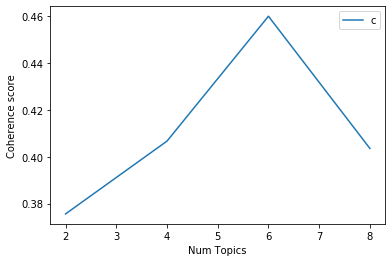

In [37]:
# Show graph

import matplotlib.pyplot as plt

limit=10; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [36]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3756
Num Topics = 4  has Coherence Value of 0.4067
Num Topics = 6  has Coherence Value of 0.4599
Num Topics = 8  has Coherence Value of 0.4035


<b>2) Optimal # of topics with TFIDF vectors<b>

In [29]:
# Can take a long time to run. In this case we are going to  k_max=10.
import datetime
print(datetime.datetime.now())

from gensim.models import CoherenceModel

model_list = []
coherence_values = []
model_topics = []

for num_topics in range(1, 10):
    #sg_lda_x = gensim.models.ldamodel.LdaModel(corpus=sg_vecs, id2word=sg_dictionary, num_topics=num_topics)
    lda_lem_mallet_tfidf = gensim.models.wrappers.LdaMallet(mallet_path, iterations=100, corpus=vec_lem_with_tfidf, num_topics=no_topics, id2word=dict_lem)
    coherencemodel = CoherenceModel(model=lda_lem_mallet_tfidf, texts=doc_lem, dictionary=dict_lem, coherence='c_v')
    model_topics.append(num_topics)
    model_list.append(lda_lem_mallet_tfidf)
    coherence_values.append(coherencemodel.get_coherence())
    print("#Topics: " + str(num_topics) + " Score: " + str(coherencemodel.get_coherence()))

print(datetime.datetime.now())

2020-03-23 14:46:59.309670


/Users/jaslynwong/opt/anaconda3/lib/python3.7/site-packages/gensim/models/wrappers/ldamallet.py:379: RuntimeWarning: invalid value encountered in true_divide
  return topics / topics.sum(axis=1)[:, None]


#Topics: 1 Score: 0.7480529137541319
#Topics: 2 Score: 0.7495756101415517
#Topics: 3 Score: 0.7542675824993572
#Topics: 4 Score: 0.747937211697924
#Topics: 5 Score: 0.7530862038079766
#Topics: 6 Score: 0.7522199405474651
#Topics: 7 Score: 0.7506811364149012
#Topics: 8 Score: 0.7530862038079766
#Topics: 9 Score: 0.7501240478762997
2020-03-23 14:47:51.693892


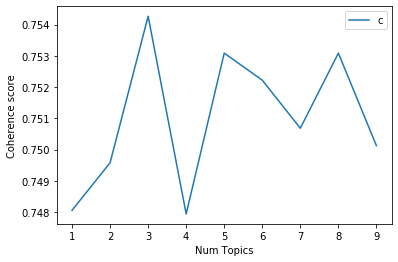

In [31]:
# Show graph

import matplotlib.pyplot as plt

limit=10; start=1; #step=2;
x = range(start, limit) #, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [32]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 1  has Coherence Value of 0.7481
Num Topics = 2  has Coherence Value of 0.7496
Num Topics = 3  has Coherence Value of 0.7543
Num Topics = 4  has Coherence Value of 0.7479
Num Topics = 5  has Coherence Value of 0.7531
Num Topics = 6  has Coherence Value of 0.7522
Num Topics = 7  has Coherence Value of 0.7507
Num Topics = 8  has Coherence Value of 0.7531
Num Topics = 9  has Coherence Value of 0.7501


# Most Dominant Topic for each Document

In [33]:
#Find most dominant topic

import numpy as np
import pandas as pd

def format_topics_sentences(ldamodel, corpus, data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(data)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

#I choose model_list[1] where the number of topics is 4

df_topic_sents_keywords = format_topics_sentences(ldamodel=model_list[1], corpus=vec_lem_with_tfidf, data=doc_lem)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

/Users/jaslynwong/opt/anaconda3/lib/python3.7/site-packages/gensim/models/wrappers/ldamallet.py:448: RuntimeWarning: invalid value encountered in true_divide
  topic = topic / topic.sum()  # normalize to probability dist


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.1,"issue, pokey, unlikely, pantry, marginally, mi...","[Have, stayed, I, e, 9yrs, ago, shop, longer, ..."
1,1,0.0,0.1,"issue, pokey, unlikely, pantry, marginally, mi...","[Personally, would, choose, hotel, closer, ano..."
2,2,0.0,0.1,"issue, pokey, unlikely, pantry, marginally, mi...","[The, room, great, size, city, hotel]"
3,3,0.0,0.1,"issue, pokey, unlikely, pantry, marginally, mi...","[The, shower, great, Lovely, old, building, ch..."
4,4,0.0,0.1,"issue, pokey, unlikely, pantry, marginally, mi...","[The, room, small, bathroom, minute]"
5,5,0.0,0.1,"issue, pokey, unlikely, pantry, marginally, mi...","[A, bedside, lamp, would, easier, eye, ceiling..."
6,6,0.0,0.1,"issue, pokey, unlikely, pantry, marginally, mi...","[There, low, level, noise, outside, room, prob..."
7,7,0.0,0.1,"issue, pokey, unlikely, pantry, marginally, mi...","[conditioning, unit, take, earplug, light, sle..."
8,8,0.0,0.1,"issue, pokey, unlikely, pantry, marginally, mi...","[The, bar, price, room, small, side]"
9,9,0.0,0.1,"issue, pokey, unlikely, pantry, marginally, mi...","[Aircon, broken, first, room, work, second, No..."


# Save Model

In [ ]:
#Save a model to disk, or reload a pre-trained model
lda_mallet_lem_tfidf=ldamallet #Or you can save the best model, model_list[1] lda_lem_mallet_tfidf

lda_mallet_lem_tfidf.save("lda_mallet_lem_tfidf")

lda_disk=gensim.models.wrappers.LdaMallet.load("lda_mallet_lem_tfidf")